# Decision Tree Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv(r"E:\Practical Machine Learning\Day 3\Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Decision Tree Regression model on the whole dataset

In [4]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

## Predicting a new result

In [5]:
regressor.predict([[6.5]])

array([150000.])

## Visualising the Decision Tree Regression results (higher resolution)

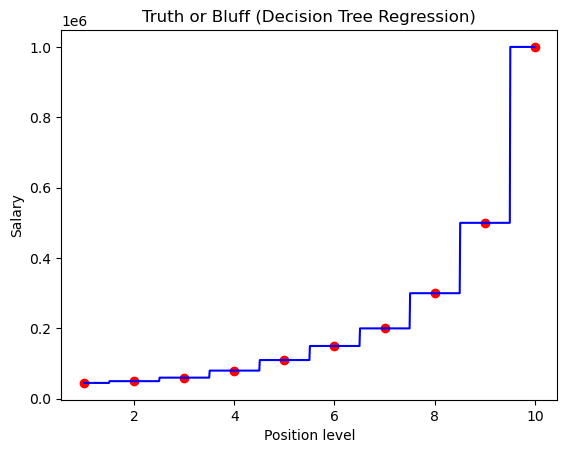

In [6]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [7]:
#from sklearn import tree
#from sklearn.tree import export_graphviz

#dot_data = tree.export_graphviz(regressor, out_file=None,
#                                feature_names=X.columns,
#                                filled=True, rounded=True,
#                                special_characters=True)

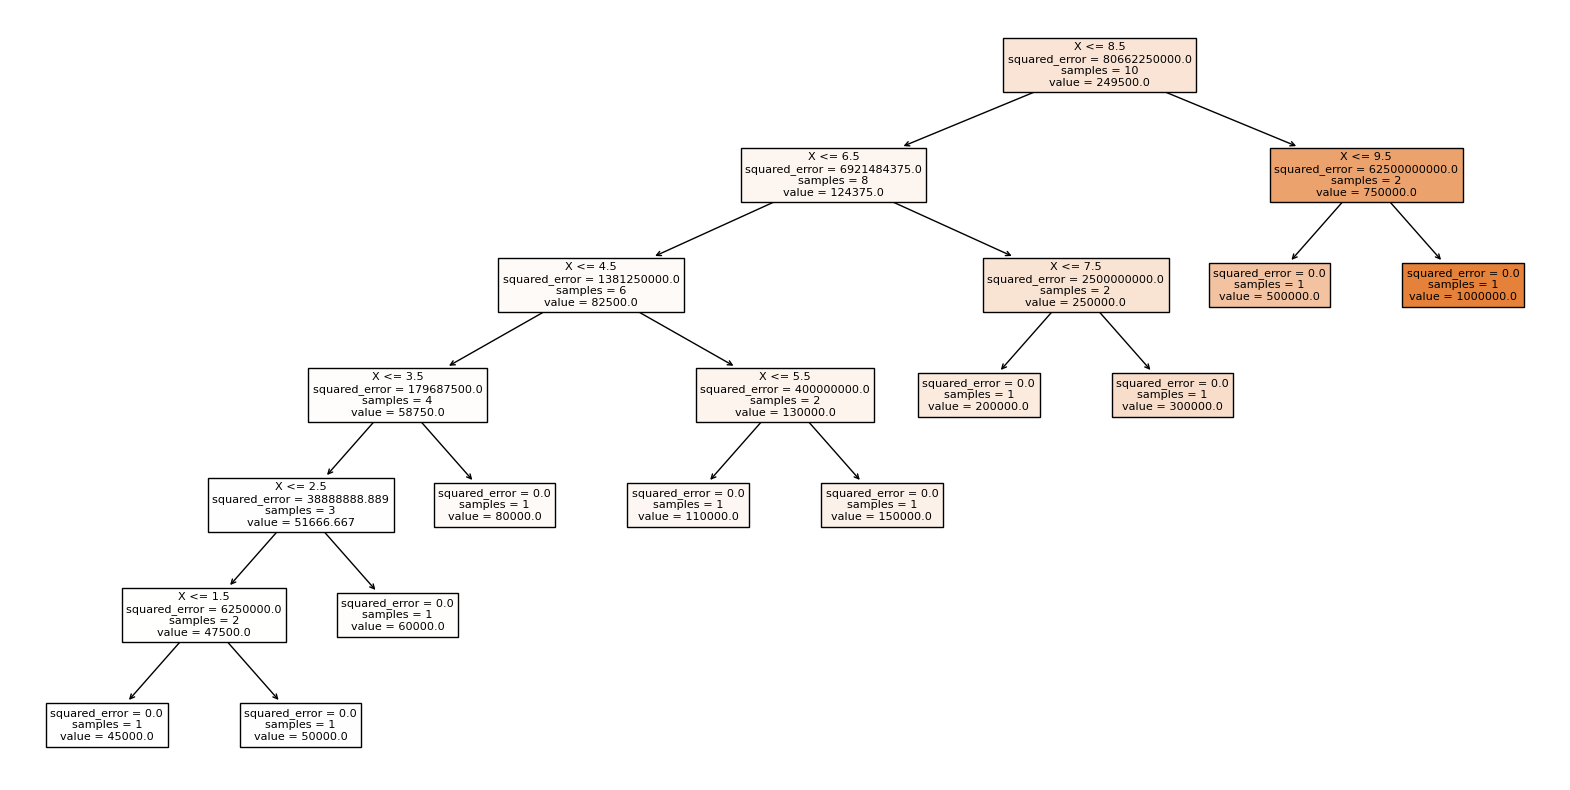

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=['X'], filled=True)
plt.show()


## Use Decision Tree Regession On HomePrice Data set 

In [9]:
housing = pd.read_csv(r"E:\Practical Machine Learning\Day 3\homeprices.csv")
housing

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,3800,725000
5,4000,770000
6,4500,850000
7,5000,920000
8,5500,980000
9,2400,510000


In [10]:
X= housing.iloc[:,:-1]
y = housing.iloc[:,1]


In [20]:
reg = DecisionTreeRegressor(random_state =0)
reg.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [23]:
reg.predict([[7000]])

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([980000.])

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


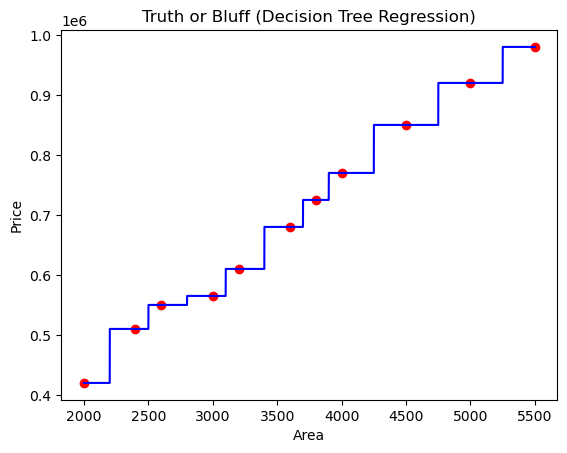

In [13]:
X_grid = np.arange(min(X.values), max(X.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

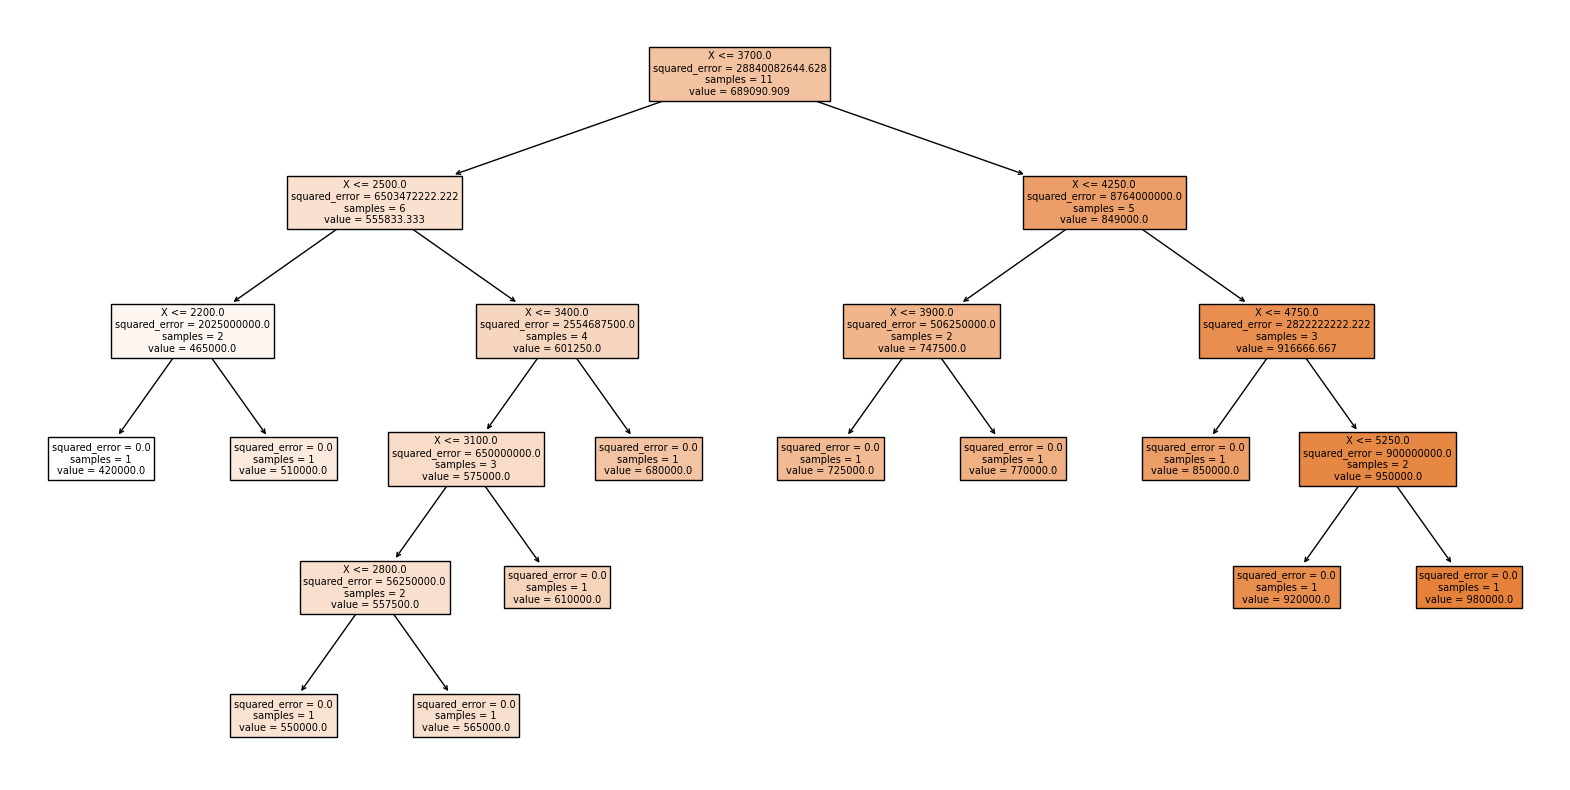

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(reg, feature_names=['X'], filled=True)
plt.show()

## Use Decision Tree Regession On Hiring Data set

In [1]:
hiring = pd.read_csv(r"E:\Practical Machine Learning\Day 3\hiring.csv")
hiring

NameError: name 'pd' is not defined

In [54]:
x=hiring.iloc[:,:-1]
y=hiring.iloc[:,-1]
x

,experience,test_score(out of 10),interview_score(out of 10)
0,NaN,8.0,9
1,NaN,8.0,6
2,five,6.0,7
3,two,10.0,10
4,seven,9.0,6
5,three,7.0,10
6,ten,NaN,7
7,eleven,7.0,8


In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan , strategy='mean')
g=x.iloc[:,1].values
x.iloc[:,1] = imputer.fit_transform(g.reshape(-1,1))


In [58]:
imputer = SimpleImputer(missing_values=np.nan , strategy='constant', fill_value= 'one')
gg= x.iloc[:,0].values
x.iloc[:,0] = imputer.fit_transform(gg.reshape(-1,1))
x                                                                     

,experience,test_score(out of 10),interview_score(out of 10)
0,one,8.000000,9
1,one,8.000000,6
2,five,6.000000,7
3,two,10.000000,10
4,seven,9.000000,6
5,three,7.000000,10
6,ten,7.857143,7
7,eleven,7.000000,8


In [68]:
from sklearn.preprocessing import  OrdinalEncoder
oe= OrdinalEncoder (categories=[['one','two','three','five','seven','ten','eleven']])
data_ord = x.iloc[:,0:1]
model=oe.fit_transform(data_ord)

In [72]:
x['experience']=model
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0.0,8.000000,9
1,0.0,8.000000,6
2,3.0,6.000000,7
3,1.0,10.000000,10
4,4.0,9.000000,6
5,2.0,7.000000,10
6,5.0,7.857143,7
7,6.0,7.000000,8


In [73]:
from sklearn.tree import DecisionTreeRegressor
reg1 = DecisionTreeRegressor(random_state=0)
reg1.fit(x,y)

DecisionTreeRegressor(random_state=0)

In [78]:
reg1.predict([[9,9,9]])

C:\Users\KARTIK\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([70000.])

In [80]:
X_grid = np.arange(min(x.values), max(x.values), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(X_grid, reg1.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position')
plt.ylabel('interview_score')
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()